In [ ]:
# Set up environment
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# supress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
homes = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/homeprices.applied.econ.csv')

homes.head(20)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no
5,45000.0,3500,2,1,1,no,no,yes,no,no,0,no
6,61700.0,4032,2,1,1,yes,no,yes,no,no,0,no
7,54500.0,3150,2,2,1,no,no,yes,no,no,0,no
8,66500.0,3745,3,1,2,yes,no,yes,no,no,0,no
9,44000.0,2160,3,1,2,no,no,yes,no,no,0,no


#Do homes with air conditioning have a higher sales price than homes without air conditioning?

In [ ]:
homes['airco'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
#group data by air conditioning and no air conditioning
air_cond = homes.loc[homes['airco'] == 'yes']
no_air_cond = homes.loc[homes['airco'] == 'no']

# run stats for each groups number of observations, mean, kurtosis, and skewness for the price column
print(stats.describe(air_cond['price']))
print(stats.describe(no_air_cond['price']))

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


Homes with air condtioning skewness and kurtosis seem normal enough, but we will have to plot visually to get a better idea of both groups, particulary homes with no air conditioning. 

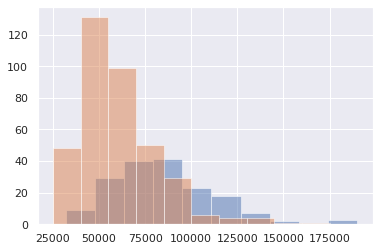

In [ ]:
#plot the groups and overlay the distributions over the top of each other
plt.hist(air_cond['price'], alpha = .5)
plt.hist(no_air_cond['price'], alpha = .5)
plt.show()

Our results look similair to the skewness and kurtosis stats we did previsouly. 

In [ ]:
print(stats.shapiro(air_cond['price']))
print(stats.shapiro(no_air_cond['price']))

(0.9571079015731812, 3.8763711927458644e-05)
(0.9110526442527771, 5.1547748545783395e-14)


In [ ]:
stats.ttest_ind(air_cond['price'], no_air_cond['price'])

Ttest_indResult(statistic=11.862852780650169, pvalue=4.972721571759431e-29)

Our p value is very significant with a less than < 0.001 result. There is less than a 0.001 chance that our results difference in means is by random chance. 

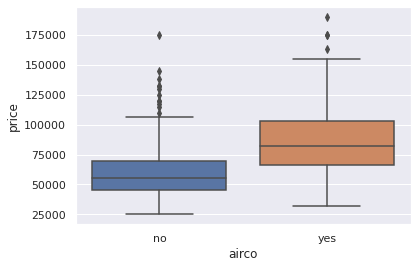

In [ ]:
# point plot to show the difference in means between air conditioned homes and non-aircondition homes
sns.boxplot(y=homes['price'], x=homes['airco'], data=homes)
                        

In [ ]:
# confidence intervals
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(air_cond['price'], no_air_cond['price']))    


The difference in means at the 95% confidence interval (two-tail) is between -30758.09492994282 and -21233.379166974857.


#Do homes with a full basement have a higher sales price than homes without a full basement?

In [ ]:
# get counts and number of unique values for the fullbase column
homes['fullbase'].value_counts()

no     355
yes    191
Name: fullbase, dtype: int64

In [ ]:
full_base = homes.loc[homes['fullbase'] == 'yes']
no_base = homes.loc[homes['fullbase'] == 'no']

print(stats.describe(full_base['price']))
print(stats.describe(no_base['price']))

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)


Kurtosis and Skewness are under +/- 3 so we will proceed by plotting the data

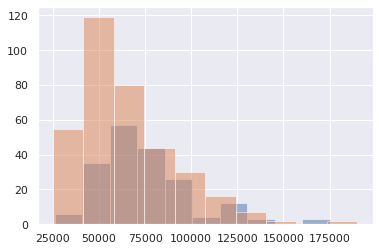

In [ ]:
#plot the groups and overlay the distributions over the top of each other
plt.hist(full_base['price'], alpha = .5)
plt.hist(no_base['price'], alpha = .5)
plt.show()

The graph shows a somewhat normal distribtion with a positive skew.

Next we will check for signifcance with a t-test

In [ ]:
stats.ttest_ind(full_base['price'], no_base['price'])

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

Our p value is very significant with a less than < 0.001 result. There is less than a 0.001 chance that our results difference in means is by random chance.

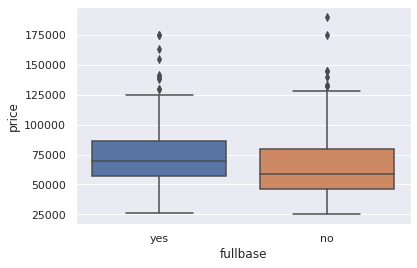

In [ ]:
# point plot to show the difference in means between air conditioned homes and non-aircondition homes
sns.boxplot(y=homes['price'], x=homes['fullbase'], data=homes)

In [ ]:
# confidence intervals
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(full_base['price'], no_base['price']))    

The difference in means at the 95% confidence interval (two-tail) is between -15032.294775656886 and -5801.544262762097.


[[Text(0, 0, 'fullbase_yes'), Text(0, 0, 'fullbase_no')]]

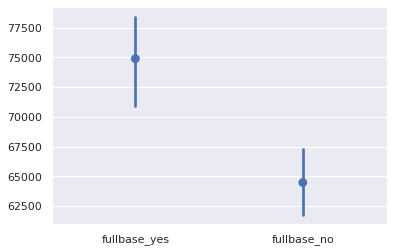

In [ ]:
g = sns.pointplot(data=[full_base['price'], no_base['price']], join=False)
                        
g.set(xticklabels = ['fullbase_yes', 'fullbase_no'])